#**Mall Customer Segmentation**

#**Problem Statement**

**Customer Segmentation is a popular application of unsupervised learning. Mall customer segmentation is the process of dividing customers into groups or segments based on their characteristics, behaviors, preferences, or purchasing patterns. This segmentation allows businesses, such as malls or retail stores, to better understand their customers and tailor their marketing strategies, product offerings, and services to meet the specific needs and preferences of each segment**

**we use  K-means unsupervised ML Algorithm to partition the data points into K distinct, non-overlapping clusters, where each data point belongs to the cluster with the nearest mean (centroid)**

**For example, a group of customers have high income but their spending score (amount spent in the
mall) is low so from the analysis we can convert such type of customers into potential customers
(whose spending score is high) by using strategies like better advertising, accepting feedback and
improving the quality of products**

#**About Dataset**

**The dataset name is Mall_Customers.csv
consists of 5 columns which are
CustomerID, Gender, Age, Annual Income
(k$), Spending Score (1-100) where
Gender is a categorical value and rest all are numeric.
The size of the dataset is (200, 5) which
is 200 rows and 5 columns.**


**Dataset link:** https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

**Importing libraries**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Load the dataset**

In [44]:
df= pd.read_csv("/content/Mall_Customers.csv")

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Asssessing the data**

In [46]:
df.shape

(200, 5)

In [47]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [48]:
#description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


**checking for null values**

In [49]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [50]:
#checking duplicate values
df.duplicated().sum()

0

In [51]:
#last 5 data
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [52]:
#data types
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Data Cleaning**

In [54]:
new_df = df.copy(deep=True)

In [55]:
# Dropping the column of 'CustomerID' as it does not provide any value
new_df.drop(columns="CustomerID",inplace=True)

In [56]:
new_df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [57]:
#rename the columns 'Annual Income (k$)' to income and 'Spending Score (1-100)' to spendig_score
new_df.rename(columns={"Annual Income (k$)":"Income","Spending Score (1-100)":"score"},inplace=True)

#**Exploratory Data Analysis**

In [58]:
new_df.head()

,Gender,Age,Income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


lets see avg income,score based on gender

In [59]:
new_df.groupby("Gender").mean()

,Age,Income,score
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


we can see that men earn more income but female spend most of the income

In [60]:
new_df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

**Total count By Gender**

<Axes: xlabel='Gender', ylabel='count'>

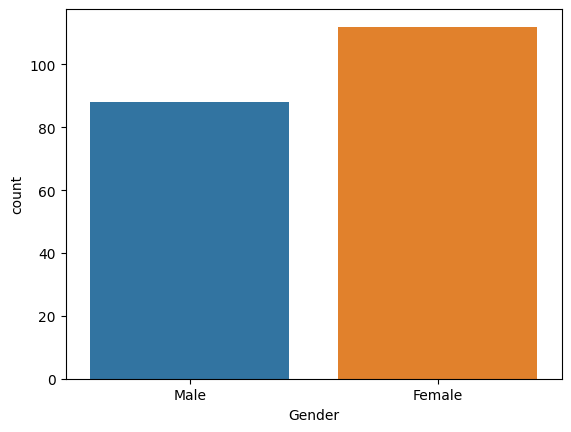

In [61]:
sns.countplot(data=new_df,x="Gender",hue="Gender")

**In a dataset female customer are more than male**

**Age plot**

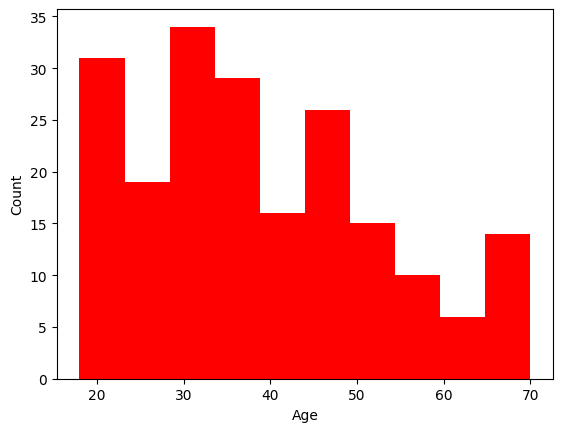

In [62]:
# Visualising the columns 'Age' using Histogram
plt.hist(x=new_df['Age'], bins=10, color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Age plot - Observation**

From the Histogram it is seen  that there are 3 age groups that are more frequently shop at the mall, they are: 15-22 years, 30-40 years and 45-50 years.

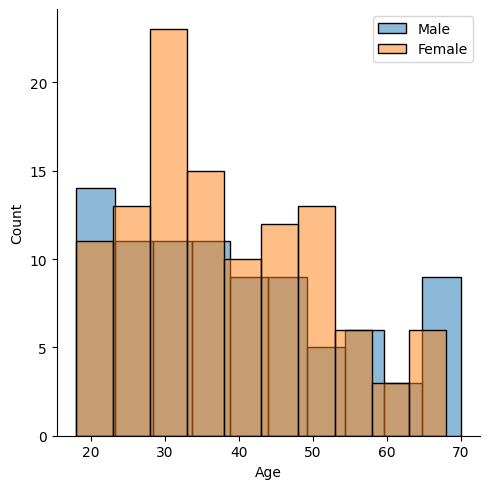

In [63]:
#distribution of Age by Gender
g=sns.FacetGrid(new_df,hue="Gender",height=5)
g.map(sns.histplot,"Age",bins=10,kde=False,alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

**we can observe that from year 15 to 23 and 67 to 70  male spend more than female and others age female spend more**

**Score Plot**

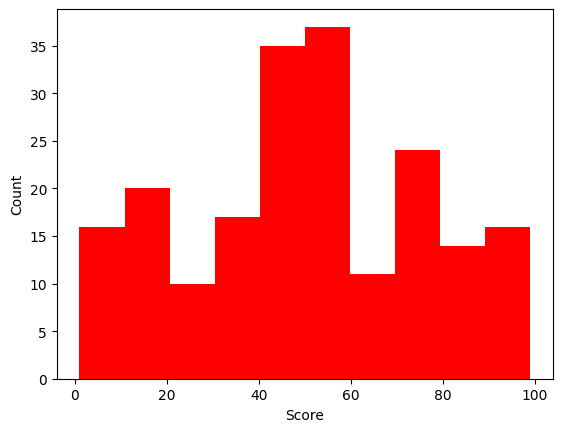

In [64]:
# Visualising the columns 'Age' using Histogram
plt.hist(x=new_df['score'], bins=10,color='red')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

**most of the score lie between 40 to 60**

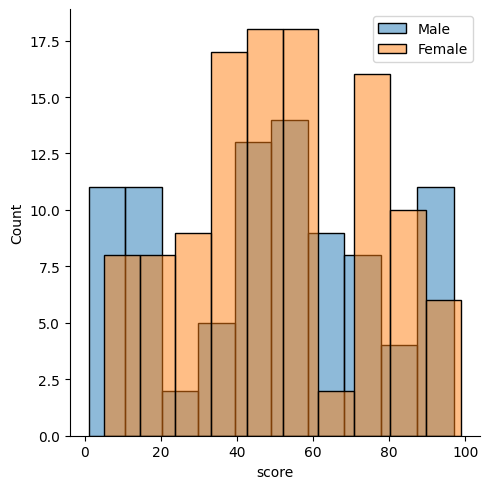

In [65]:
#distribution of score by Gender
g=sns.FacetGrid(new_df,hue="Gender",height=5)
g.map(sns.histplot,"score",bins=10,kde=False,alpha=0.5)
plt.xlabel('score')
plt.ylabel('Count')
plt.legend()
plt.show()

**Female spent more than male**

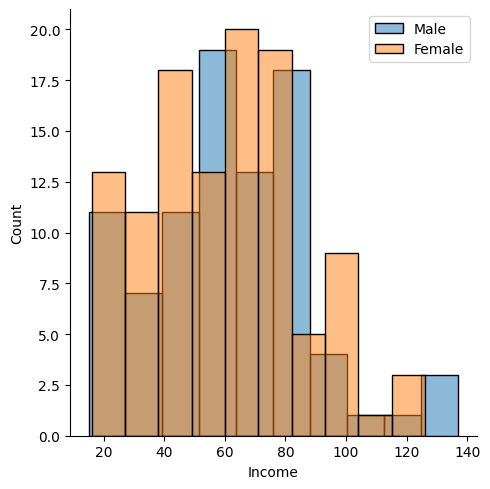

In [66]:
#distribution of income by Gender
g=sns.FacetGrid(new_df,hue="Gender",height=5)
g.map(sns.histplot,"Income",bins=10,kde=False,alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend()
plt.show()

**Age Vs Spending Score**

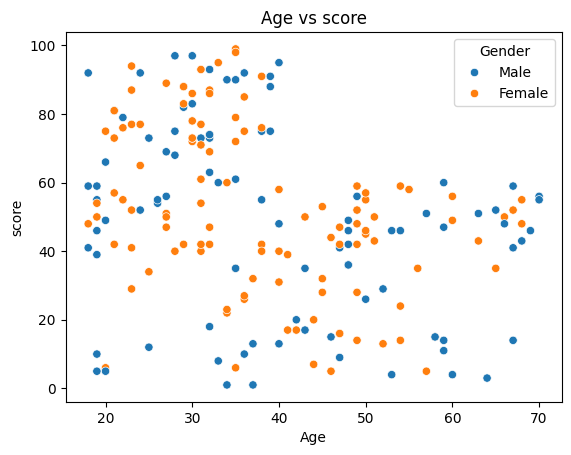

In [67]:
#scatterplot
sns.scatterplot(data=new_df,x="Age",y="score",hue="Gender")
plt.title("Age vs score")
plt.show()

Age Vs Spending Score - Observation

1. From the Age Vs Spending Score plot we observe that customers whose spending score is more than 65 have their Age in the range of 15-42 years. Also from the Scatter plot it is observed that customers whose spending score is more than 65 consists of more Females than Males.

2. Also, the customers having average spending score ie: in the range of 40-60 consists of age group of the range 15-75 years and the count of Male and Female in this age group is also approximatly the same.

**Age vs Income**

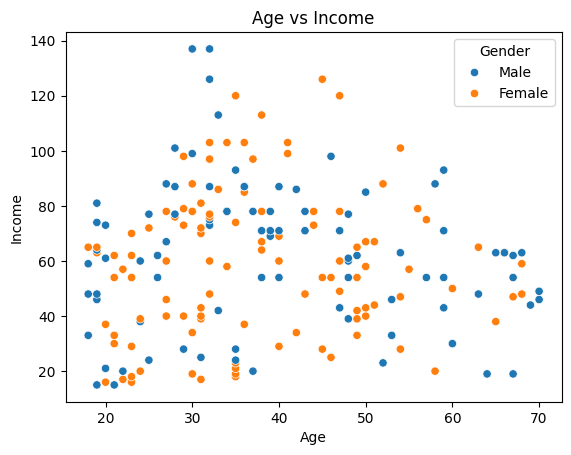

In [68]:
#scatterplot
sns.scatterplot(data=new_df,x="Age",y="Income",hue="Gender")
plt.title("Age vs Income")
plt.show()

**25 to 38 age group have high income**

**Annual Income Vs Spending Score**

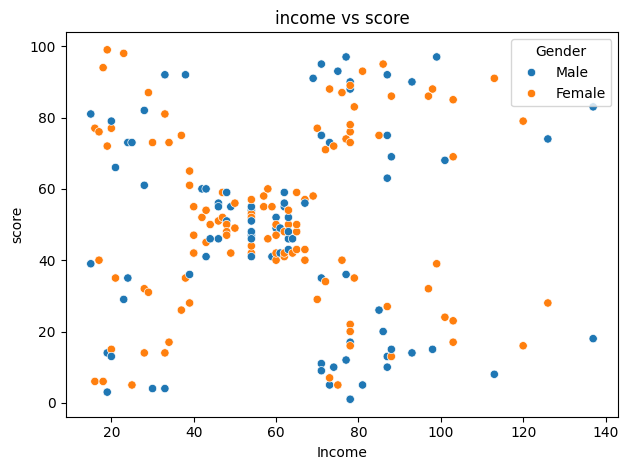

In [69]:
sns.scatterplot(data=new_df, x='Income', y='score', hue='Gender')
plt.title("income vs score")
plt.tight_layout()
plt.show()

**Annual Income Vs Spending Score - Observation**

From the Annual Income Vs Spending Score plot we observe that there are 5 clusters and can be categorised as:

a. High Income, High Spending Score (Top Right Cluster)

b. High Income, Low Spending Score (Bottom Right Cluster)

c. Average Income, Average Spending Score (Center Cluster)

d. Low Income, High Spending Score (Top Left Cluster)

e. Low Income, Low Spending Score (Bottom Left Cluster)

#**Data Preprocessing**

In [70]:
# Selecting 'Income' and 'score' as the features for clustering
X_df = new_df[["Income","score"]]

In [71]:
X_df.head()

,Income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Finding optimal number of clusters using Elbow Method**

**The Elbow Method is a heuristic used to find the optimal number of clusters in a dataset for K-means clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and identifying the "elbow" point where the rate of decrease in WCSS slows down significantly.**

In [72]:
# Calculating WCSS values for 1 to 10 clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans_model = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans_model.fit(X_df)
  wcss.append(kmeans_model.inertia_)

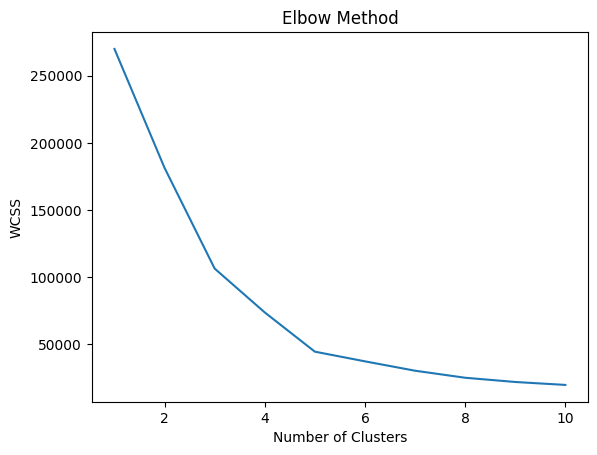

In [73]:
# Plotting the WCSS values
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**The goal is to identify the "elbow point" where the rate of decrease in WCSS slows down significantly. This point typically represents the optimal number of clusters for the dataset**

**From the above plot it is observed that 5 clusters are optimal for the given dataset.**

#**Feature Scaling**

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_df)

**Feature Scaling is performed because KMeans uses Distance (Euclidean, Manhattan, etc.) and the model perfoms faster on scaling the values**

#**Model Building**

In [75]:
# Training the KMeans model with n_clusters=5
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(X)

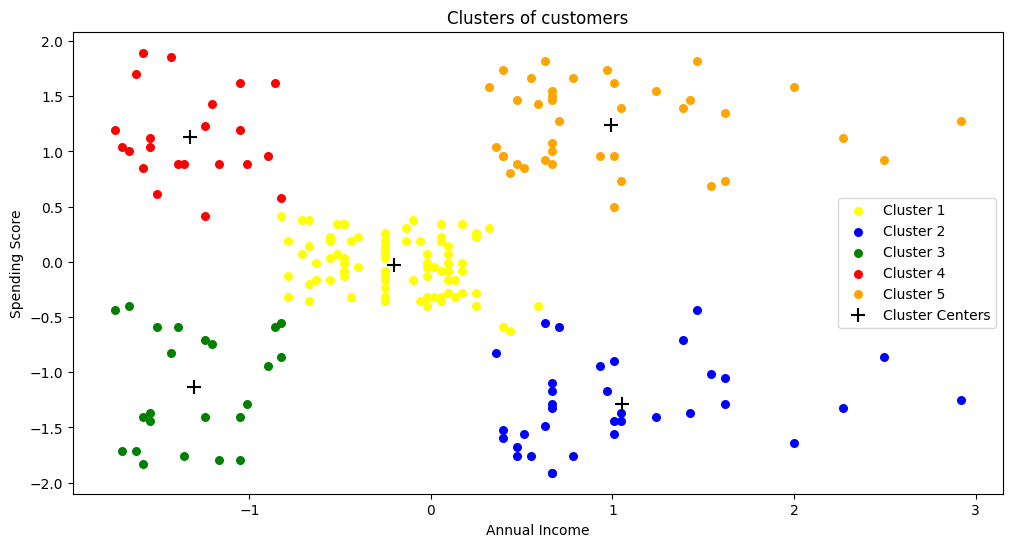

In [76]:
#plot the clusters
plt.figure(figsize=(12,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'red', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'orange', label = 'Cluster 5')

# Plotting the centroids of the clusters
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


**Clustering Analysis**

**a. High Income, High Spending Score (Cluster 5) - Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.**

**b. High Income, Low Spending Score (Cluster 2) - Target these customers by asking the feedback and advertising the product in a better way to convert them into Cluster 5 customers.**

**c. Average Income, Average Spending Score (Cluster 1) - Can target these set of customers by providing them with Low cost EMI's etc.**

**d. Low Income, High Spending Score (Cluster 4) - May or may not target these group of customers based on the policy of the mall.**

**e. Low Income, Low Spending Score (Cluster 3) - Don't target these customers since they have less income and need to save money.**

#**Model Deployment**

In [77]:
import pickle

In [78]:
#standard scalar
pickle.dump(scaler,open("scaled.pkl","wb"))

In [79]:
#kmeans_model
pickle.dump(kmeans_model,open("kmeans_model.pkl","wb"))

In [80]:
pickle.dump(X_df,open("df.pkl","wb"))

In [81]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

# Load StandardScaler and KMeans model
with open('scaled.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('kmeans_model.pkl', 'rb') as model_file:
    kmeans_model = pickle.load(model_file)

# Streamlit app
st.title('KMeans Clustering App')

# Load DataFrame from pickle file
with open('df.pkl', 'rb') as df_file:
    df = pickle.load(df_file)

# Input form for new data point
st.header('Enter New Data Point')

income = st.slider('Income', min_value=0, max_value=200, step=1)
score = st.slider('Score', min_value=0, max_value=100, step=1)

# When the user submits the form
if st.button('Predict Cluster'):
    # Preprocess the input data
    new_data = np.array([[income, score]])
    new_data_scaled = scaler.transform(new_data)

    # Predict the cluster
    cluster = kmeans_model.predict(new_data_scaled)[0]

    # Display the predicted cluster
    st.write(f'The data point [{income}, {score}] belongs to cluster {cluster + 1}')

    # Plot existing clusters
    X = df[['Income', 'score']].values
    y_kmeans = kmeans_model.predict(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', label='Existing Clusters')

    # Plot the new data point with a different marker and color
    plt.scatter(income, score, c='red', marker='x', label='New Data Point')

    plt.title('Clustering Results')
    plt.xlabel('Income')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    st.pyplot(plt)


ModuleNotFoundError: No module named 'streamlit'

In [84]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


In [85]:
!wget -q -O - ipv4.icanhazip.com

35.196.191.77


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501